# Learn pytorch for Deep Learning

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

### Tensors
It represent data in a numerical way.

For example, you could represent an image as a tensor with shape [3, 224, 224] which would mean [colour_channels, height, width], as in the image has 3 colour channels (red, green, blue), a height of 224 pixels and a width of 224 pixels.


 A **scalar** is a single number and in tensor-speak it's a zero dimension tensor.

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
# check the dimensions of a tensor using the ndim attribute.
scalar.ndim

0

In [ ]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

A **vector** is a single dimension tensor but can contain many numbers.

eg. [3, 2] to describe [bedrooms, bathrooms] in your house.

In [ ]:
# vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
# Check the number of dimensions of vector
vector.ndim

1

You can tell the *number of dimensions* a tensor in PyTorch has by the *number of square brackets* on the outside ([) and you only need to count one side.

**Shape attribute**:- The shape tells you how the elements inside them are arranged.

In [ ]:
# Check shape of vector
vector.shape

torch.Size([2])

 `torch.Size([2])` means two elements inside the square brackets. Eg. ([7, 7]).

**matrix**: 2-dimensional array of numbers

In [ ]:
# matrix
MATRIX = torch.tensor([[7,8], [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
# Check number of dimensions
MATRIX.ndim

2

MATRIX has two dimensions (did you count the number of square brakcets on the outside of one side?)

In [ ]:
MATRIX.shape

torch.Size([2, 2])

Output is `torch.Size([2, 2])` because MATRIX has two elements deep and two elements wide.

tensor

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])

TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

 tensors can represent almost anything.

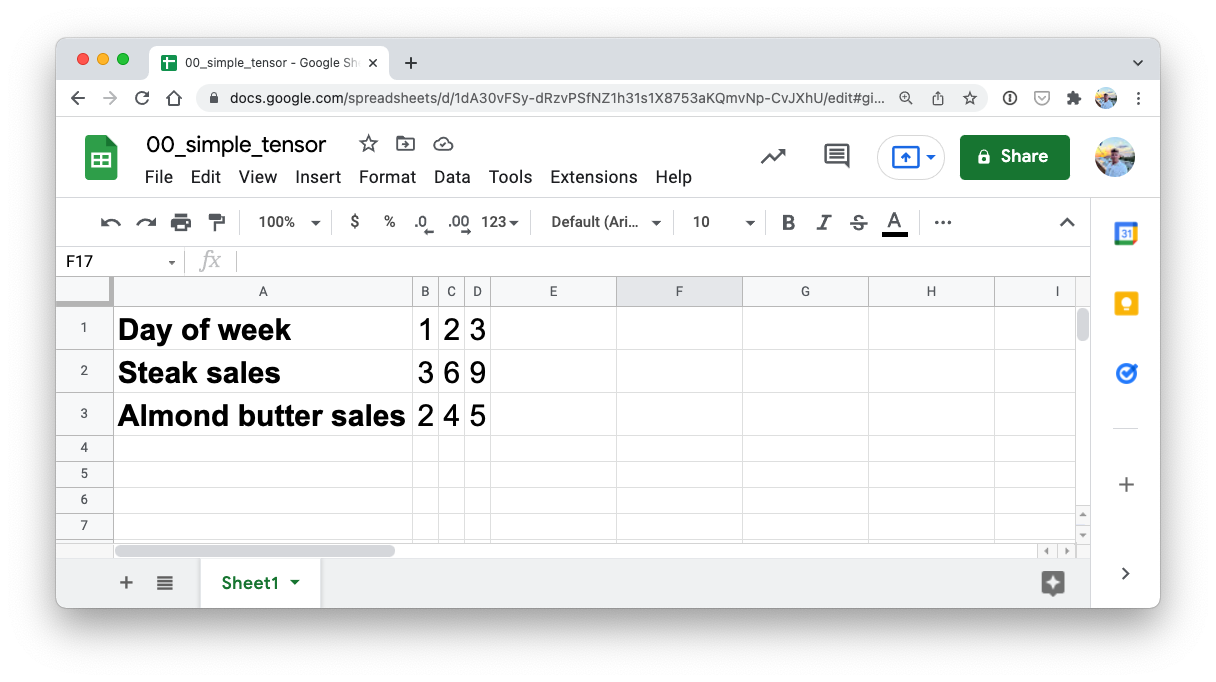

How many dimensions do you think it has? (hint: use the square bracket counting trick)

In [ ]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [ ]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

`torch.Size([1, 3, 3])` means there's 1 dimension of 3 by 3.

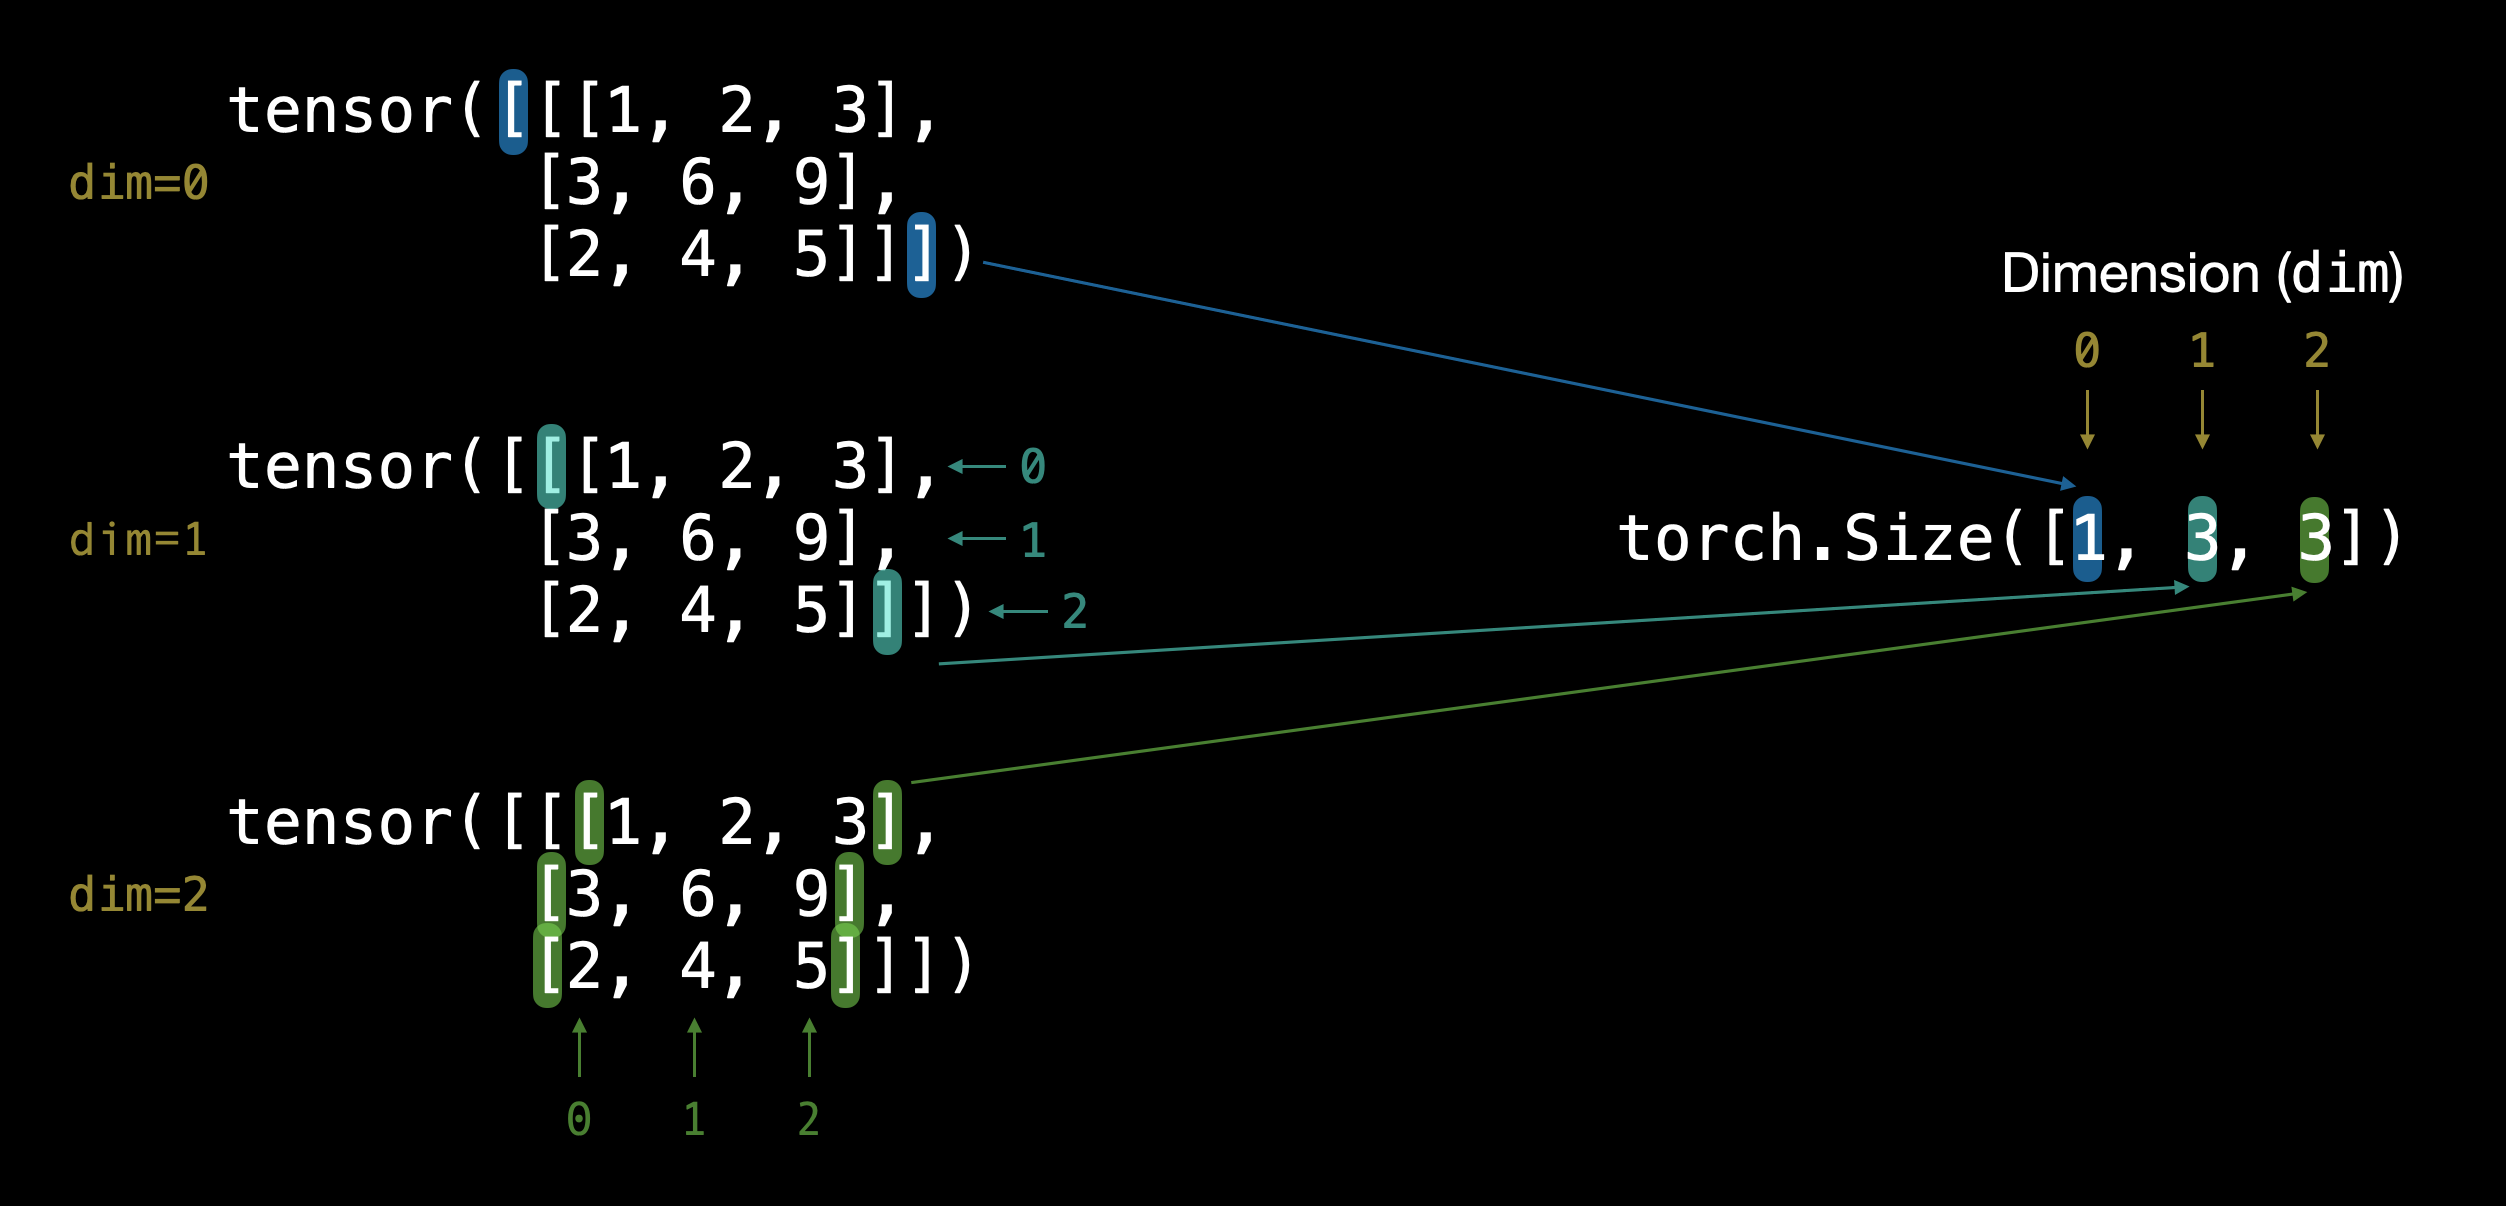

> **Note:** You might've noticed me using lowercase letters for scalar and vector and uppercase letters for MATRIX and TENSOR. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as y or a. And matrices and tensors denoted as uppercase letters such as X or W.















### Random tensors
let's see how to create a tensor of random numbers.

We can do so using `torch.rand()` and passing in the `size` parameter.

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.0651, 0.9784, 0.9323, 0.0254],
         [0.3308, 0.0402, 0.7236, 0.4833],
         [0.5542, 0.3291, 0.6533, 0.2235]]),
 torch.float32)

The flexibility of `torch.rand()` is that we can adjust the `size` to be whatever we want.

For example, say you wanted a random tensor in the common image shape of [224, 224, 3] ([height, width, color_channels]).

In [ ]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(244, 244, 3))
random_image_size_tensor.shape , random_image_size_tensor.ndim

(torch.Size([244, 244, 3]), 3)

### Zeros and ones
Sometimes you'll just want to fill tensors with zeros or ones.

This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Creating a range and tensors like
Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use `torch.arange(start, end, step)` to do so.

Where:



*   `start` = start of range (e.g. 0)
*   `end` = end of range (e.g. 10)
*   `step` = how many steps in between each value (e.g. 1)

> **Note:** In Python, you can use `range`() to create a range. However in PyTorch, `torch.range()` is deprecated and may show an error in the future.



In [ ]:
# Use torch.arange(), torch.range() is deprecated
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

<ipython-input-18-a404776195c1>:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor.

To do so you can use `torch.zeros_like(input)` or `torch.ones_like(input)` which return a tensor filled with zeros or ones in the same shape as the `input` respectively.

In [ ]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes
There are many different tensor datatypes available in PyTorch.

Some are specific for CPU and some are better for GPU.

Getting to know which is which can take some time.

Generally if you see `torch.cuda` anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

The most common type (and generally the default) is `torch.float32` or `torch.float`.

This is referred to as "32-bit floating point".

But there's also 16-bit floating point (`torch.float16` or `torch.half`) and 64-bit floating point (`torch.float64` or torch.double).

And to confuse things even more there's also 8-bit, 16-bit, 32-bit and 64-bit integers.

Plus more!

> **Note:** An integer is a flat round number like 7 whereas a float has a decimal 7.0.

The reason for all of these is to do with **precision in computing**.

Precision is the amount of detail used to describe a number.

The higher the precision value (8, 16, 32), the more detail and hence data used to express a number.

This matters in deep learning and numerical computing because you're making so many operations, the more detail you have to calculate on, the more compute you have to use.

So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate).

Let's see how to create some tensors with specific datatypes. We can do so using the `dtype` parameter.

In [ ]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

Most common issues in PyTorch are datatype and device issuses.

For example, one of tensors is `torch.float32` and the other is torch.float16 (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).

We'll see more of this device talk later on.

In [ ]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype = torch.float16) # torch.half would also wor

float_16_tensor.dtype

torch.float16

# Getting information from tensors
three of the most common attributes you'll want to find out about tensors are:


*   shape
*   dtype
*   device - (usually GPU or CPU)



In [ ]:
# create tensor
some_tensor = torch.rand(3, 4)

# find out detail about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.7896, 0.5940, 0.3323, 0.0966],
        [0.3899, 0.2801, 0.6675, 0.3294],
        [0.4398, 0.3564, 0.7688, 0.1924]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


> Note: When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":



*   "*what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where*"


# Manipulating tensors (tensor operations)
In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

operations / (or basic building blocks of neural networks):

*   Addition
*   Substraction
*   Nultiplication (element-wise)
*   Division
*   Matrix multiplication



# Basic operations

Let's start with a few of the fundamental operations, addition (+), subtraction (-), mutliplication (*).

In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply it by 10
tensor*10

tensor([10, 20, 30])

Notice how the tensor values above didn't end up being tensor([110, 120, 130]), this is because the values inside the tensor don't change unless they're reassigned.

In [ ]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

Let's subtract a number and this time we'll reassign the tensor variable.

In [ ]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [ ]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

PyTorch also has a bunch of built-in functions like torch.mul() (short for multiplication) and torch.add() to perform basic operations.

In [ ]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [ ]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [ ]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


# Matrix multiplication (is all you need)

PyTorch implements matrix multiplication functionality in the `torch.matmul()` method.

The main two rules for matrix multiplication are:


1.   The **inner dimensions** must match:



>  
*   `(3, 2) @ (3, 2)` won't work
*   `(2, 3) @ (3, 2)` will work
*   `(3, 2) @ (2, 3)` will work


2.   The resulting matrix has the shape of the **outer dimensions**:

>     
*   `(2, 3) @ (3, 2) -> (2, 2)`
*  `(3, 2) @ (2, 3) -> (3, 3)`

>   **Note:** "@" in Python is the symbol for matrix multiplication.





Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.

In [ ]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| -------------- | -------------- | -------------- |
| Element-wise multiplication | `[11, 22, 33] = [1, 4, 9]` | `tensor * tensor` |
| Matrix multiplication | `[1*1 + 2*2 + 3*3] = [14]` | tensor.matmul(tensor) |


In [ ]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

You can do matrix multiplication by hand but it's not recommended.

The in-built torch.matmul() method is faster.

In [ ]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.36 ms, sys: 113 µs, total: 1.47 ms
Wall time: 2.73 ms


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 70 µs, sys: 0 ns, total: 70 µs
Wall time: 74.4 µs


tensor(14)

# One of the most common errors in deep learning (shape errors)

One of the most common errors you'll run into in deep learning is shape mismatches.

In [ ]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 8],
                         [9, 10],
                         [11, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B)   # (this will error)

RuntimeError: ignored

We can make matrix multiplication work between `tensor_A` and `tensor_B` by making their inner dimensions match.

One of the ways to do this is with a **transpose** (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:


*   `torch.transpose(input, dim0, dim1)` - where `input` is the desired tensor to transpose and `dim0` and `dim1` are the dimensions to be swapped.
*   `tensor.T` - where `tensor` is the desired tensor to transpose.



In [ ]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]])


In [ ]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  9., 11.],
        [ 8., 10., 12.]])


In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shape: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Nultiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimention match \n")
print("Output: \n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shape: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Nultiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimention match 

Output: 

tensor([[ 23.,  29.,  35.],
        [ 53.,  67.,  81.],
        [ 83., 105., 127.]])

Output shape: torch.Size([3, 3])


In [ ]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 23.,  29.,  35.],
        [ 53.,  67.,  81.],
        [ 83., 105., 127.]])

Without the transpose, the rules of matrix mulitplication aren't fulfilled and we get an error like above.

>  **Note:** A matrix multiplication like this is also referred to as the `dot product` of two matrices.

Neural networks are full of matrix multiplications and dot products.

The `torch.nn.Linear()` module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

Y = x⋅A^T + b

Where:

*   `x` is the input to the layer (deep learning is a stack of layers like torch.nn.Linear() and others on top of each other).
*   `A` is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "`T`", that's because the weights matrix gets transposed).

    *  **Note:** You might also often see `W` or another letter like `X` used to showcase the weights matrix.

*  `b` is the bias term used to slightly offset the weights and inputs.

*  `y` is the output (a manipulation of the input in the hopes to discover patterns in it).

This is a linear function (you may have seen something like
`y=mx+b` in high school or elsewhere), and can be used to draw a straight line!

Let's play around with a linear layer.

Try changing the values of `in_features` and `out_features` below and see what happens.

Do you notice anything to do with the shapes?


In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2,   # in_features = matches inner dimension of input
                         out_features=6)  # out_features = describes outer value

x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")


Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


>  **Question:** What happens if you change `in_features` from 2 to 3 above? Does it error? How could you change the shape of the input (`x`) to accomodate to the error? Hint: what did we have to do to `tensor_B` above?

### Finding the min, max, mean, sum, etc (aggregation)



In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# Now let's perform some aggregation.
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}")  # this will error
print(f"Mean: {x.type(torch.float32).mean()}")
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


>  **Note:** You may find some methods such as `torch.mean()` require tensors to be in `torch.float32` (the most common) or another specific datatype, otherwise the operation will fail.



You can also do the same as above with torch methods.

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max

You can also find the index of a tensor where the max or minimum occurs with torch.argmax() and torch.argmin() respectively.



In [ ]:
# Create a tensor
tensor = torch.arange(0, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index whare max value occurs: {tensor.argmax()}")
print(f"Index whare min value occurs: {tensor.argmin()}")

Tensor: tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Index whare max value occurs: 9
Index whare min value occurs: 0


### Change tensor datatype
As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using `torch.Tensor.type(dtype=None)` where the `dtype` parameter is the datatype you'd like to use.

First we'll create a tensor and check it's datatype (the default is `torch.float32`).

In [ ]:
# Create a tenosr and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

Now we'll create another tensor the same as before but change its datatype to `torch.float16`.

In [ ]:
tensor_float16 = tensor.type(torch.float16)
tensor_float16.dtype
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

And we can do something similar to make a torch.int8 tensor.

In [ ]:
# Create a int8 tenosr
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

>  Note: Different datatypes can be confusing to begin with. But think of it like this, the lower the number (e.g. 32, 16, 8), the less precise a computer stores the value. And with a lower amount of storage, this generally results in faster computation and a smaller overall model. Mobile-based neural networks often operate with 8-bit integers, smaller and faster to run but less accurate than their float32 counterparts. For more on this, I'd read up about precision in computing.

###  Reshaping, stacking, squeezing and unsqueezing
Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.


| Method | One line description |
|--------------|-------------|
| torch.reshape(input, shape) | Reshapes input to shape (if compatible), can also use torch.Tensor.reshape(). |
| torch.Tensor.view(shape) | Returns a view of the original tensor in a different shape but shares the same data as the original tensor. |
| torch.stack(tensors, dim=0) | Concatenates a sequence of tensors along a new dimension (dim), all tensors must be same size. |
| torch.squeeze(input) | Squeezes input to remove all the dimenions with value 1. |
| torch.unsqueeze(input, dim) | Returns input with a dimension value of 1 added at dim. |
| torch.permute(input, dims) | Returns a view of the original input with its dimensions permuted (rearranged) to dims.|

##### Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make the right elements of your tensors are mixing with the right elements of other tensors.


In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Now let's add an extra dimension with `torch.reshape()`.

In [ ]:
# Add an extra dimention
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

We can also change the view with torch.view().

In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723

x
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the same tensor.

So changing the view changes the original tensor too.

In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

If we wanted to stack our new tensor on top of itself five times, we could do so with `torch.stack()`.

In [ ]:
# Stack tensor on top of each other
x_stacked = torch.stack([x, x, x, x], dim= 0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

How about removing all single dimensions from a tensor?

To do so you can use `torch.squeeze()` (I remember this as squeezing the tensor to only have dimensions over 1).

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shpe: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shpe: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


And to do the reverse of torch.squeeze() you can use torch.unsqueeze() to add a dimension value of 1 at a specific index.

In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimention with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


You can also rearrange the order of axes values with `torch.permute(input, dims)`, where the `input` gets turned into a view with new `dims`.

In [ ]:
#Create tensor with specific shape
x_original = torch.rand(size=(244, 244, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1)    # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([244, 244, 3])
New shape: torch.Size([3, 244, 244])


>  **Note:** Because permuting returns a view (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

### Indexing (selecting data from tensors)
Sometimes you'll want to select specific data from tensors (for example, only the first column or second row).

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.

In [ ]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape, x.ndim

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]),
 3)

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [ ]:
# let's index bracket by bracket
print(f"First square bracket:\n {x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use `:` to specify "all values in this dimension" and then use a comma (`,`) to add another dimension.

In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]      # same as x[0][0]

tensor([1, 2, 3])

Indexing can be quite confusing to begin with, especially with larger tensors

### PyTorch tensors & NumPy
Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:

*  `torch.from_numpy(ndarray)` - NumPy array -> PyTorch tensor.
*  `torch.Tensor.numpy()` - PyTorch tensor -> NumPy array.

In [ ]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

> **Note:** By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).

>  However, many PyTorch calculations default to using `float32`.

>  So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use `tensor = torch.from_numpy(array).type(torch.float32)`.

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [ ]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

And if you want to go from PyTorch tensor to NumPy array, you can call tensor.numpy().

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)     # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy()     # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

And the same rule applies as above, if you change the original tensor, the new numpy_tensor stays the same.

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Reproducibility (trying to take the random out of random)
As you learn more about neural networks and machine learning, you'll start to discover how much randomness plays a part.

Well, pseudorandomness that is. Because after all, as they're designed, a computer is fundamentally deterministic (each step is predictable) so the randomness they create are simulated randomness (though there is debate on this too, but since I'm not a computer scientist, I'll let you find out more yourself).

How does this relate to neural networks and deep learning then?

We've discussed neural networks start with random numbers to describe patterns in data (these numbers are poor descriptions) and try to improve those random numbers using tensor operations (and a few other things we haven't discussed yet) to better describe patterns in data.

In short:

`start with random numbers -> tensor operations -> try to make better (again and again and again)`

Although randomness is nice and powerful, sometimes you'd like there to be a little less randomness.

Why?

So you can perform repeatable experiments.

For example, you create an algorithm capable of achieving X performance.

And then your friend tries it out to verify you're not crazy.

How could they do such a thing?

That's where **reproducibility** comes in.

In other words, can you get the same (or very similar) results on your computer running the same code as I get on mine?

Let's see a brief example of reproducibility in PyTorch.

We'll start by creating two random tensors, since they're random, you'd expect them to be different right?

In [ ]:
import torch

# Create two random tenosrs
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n {random_tensor_A}\n")
print(f"Tensor B:\n {random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
 tensor([[0.7075, 0.2618, 0.8436, 0.5131],
        [0.6550, 0.9248, 0.1114, 0.7061],
        [0.0459, 0.3641, 0.4877, 0.1512]])

Tensor B:
 tensor([[0.3797, 0.0090, 0.1240, 0.3198],
        [0.3693, 0.6229, 0.5874, 0.9480],
        [0.9063, 0.6673, 0.9225, 0.1615]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Just as you might've expected, the tensors come out with different values.

But what if you wanted to created two random tensors with the same values.

As in, the tensors would still contain random values but they would be of the same flavour.

That's where `torch.manual_seed(seed)` comes in, where `seed` is an integer (like `42` but it could be anything) that flavours the randomness.

Let's try it out by creating some more flavoured random tensors.

In [ ]:
import torch
import random

# Set the random seed
RANDOM_SEED = 42      # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED)      # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n {random_tensor_C}\n")
print(f"Tensor D:\n {random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D


Tensor C:
 tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
 tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

Nice!

It looks like setting the seed worked.

### Running tensors on GPUs (and making faster computations)
Deep learning algorithms require a lot of numerical operations.

And by default these operations are often done on a CPU (computer processing unit).

However, there's another common piece of hardware called a GPU (graphics processing unit), which is often much faster at performing the specific types of operations neural networks need (matrix multiplications) than CPUs.

Your computer might have one.

If so, you should look to use it whenever you can to train neural networks because chances are it'll speed up the training time dramatically.

There are a few ways to first get access to a GPU and secondly get PyTorch to use the GPU.

>  **Note:** When I reference "GPU" throughout this course, I'm referencing a `Nvidia GPU with CUDA` enabled (CUDA is a computing platform and API that helps allow GPUs be used for general purpose computing & not just graphics) unless otherwise specified.

### 1. Getting a GPU
You may already know what's going on when I say GPU. But if not, there are a few ways to get access to one.


| Method |	Difficulty to setup |	Pros	| Cons |	How to setup |
|---------|---------|--------|--------|-------|
| Google Colab |	Easy |	Free to use, almost zero setup required, can share work with others as easy as a link	| Doesn't save your data outputs, limited compute, subject to timeouts |	Follow the Google Colab Guide |
| Use your own |	Medium |	Run everything locally on your own machine |	GPUs aren't free, require upfront cost |	Follow the PyTorch installation guidelines |
| Cloud computing (AWS, GCP, Azure)	|Medium-Hard	Small upfront cost, access to almost infinite compute	| Can get expensive if running continually, takes some time to setup right |	Follow the PyTorch installation guidelines |

There are more options for using GPUs but the above three will suffice for now.



In [ ]:
# ! nvidia-sim    #  if you've got access to a Nvidia GPU, you can run !nvidia-smi where the ! (also called bang) means "run this on the command line".

/bin/bash: nvidia-sim: command not found


### 2. Getting PyTorch to run on the GPU
Once you've got a GPU ready to access, the next step is getting PyTorch to use for storing data (tensors) and computing on data (performing operations on tensors).

To do so, you can use the `torch.cuda` package.

Rather than talk about it, let's try it out.

You can test if PyTorch has access to a GPU using `torch.cuda.is_available()`.

In [ ]:
# check for GPU
import torch
torch.cuda.is_available()

True

If the above outputs `True`, PyTorch can see and use the GPU, if it outputs `False`, it can't see the GPU and in that case, you'll have to go back through the installation steps.

Now, let's say you wanted to setup your code so it ran on CPU or the GPU if it was available.

That way, if you or someone decides to run your code, it'll work regardless of the computing device they're using.

Let's create a `device` variable to store what kind of device is available.

In [ ]:
# set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

If the above output `"cuda"` it means we can set all of our PyTorch code to use the available CUDA device (a GPU) and if it output `"cpu"`, our PyTorch code will stick with the CPU.

>  Note: In PyTorch, it's best practice to write *device agnostic code*. This means code that'll run on CPU (always available) or GPU (if available).

If you want to do faster computing you can use a GPU but if you want to do much faster computing, you can use multiple GPUs.

You can count the number of GPUs PyTorch has access to using `torch.cuda.device_count()`.

In [ ]:
# count number of devices
torch.cuda.device_count()

1


Knowing the number of GPUs PyTorch has access to is helpful incase you wanted to run a specific process on one GPU and another process on another (PyTorch also has features to let you run a process across all GPUs).

### 3. Putting tensors (and models) on the GPU
You can put tensors (and models, we'll see this later) on a specific device by calling `to(device)` on them. Where `device` is the target device you'd like the tensor (or model) to go to.

Why do this?

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our **device agnostic code** (see above), it'll run on the CPU.

>   **Note:** Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:

>  `some_tensor = some_tensor.to(device)`

Let's try creating a tensor and putting it on the GPU (if it's available).

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

If you have a GPU available, the above code will output something like:

>  tensor([1, 2, 3]) cpu

>  tensor([1, 2, 3], device='cuda:0')


Notice the second tensor has `device='cuda:0'`, this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be `'cuda:0'` and `'cuda:1'` respectively, up to `'cuda:n'`)

### 4. Moving tensors back to the CPU
What if we wanted to move the tensor back to CPU?

For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

Let's try using the `torch.Tensor.numpy()` method on our `tensor_on_gpu`

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: ignored

Instead, to get a tensor back to CPU and usable with NumPy we can use `Tensor.cpu`().

This copies the tensor to CPU memory so it's usable with CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')